In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import seaborn as sns

import json
with open('config.json') as config_file:
     data = json.load(config_file)
print(data)
x = []
a = 0
while a < 1000:
     a = a+1
     
     last_price          = data['Current_Price']
     annual_drift        = data['Annual_Drift']
     annual_volatility   = data['Annual_Volatiltiy']
     time_period         = data['Time_Period']
     simu                = data['No_of_days']
     r                   = data['rate_return']
     sigma               = data['sigma']
     price               = data['Current_Price']

     df = pd.DataFrame()

     last_price_list = [last_price]
     diff_list       = []
     tenor_list      = [0.083333333333333333]
     count           = 0
     count_list      = []
     while count < simu:
          count = count + 1
          difference = last_price*annual_drift*time_period + last_price*annual_volatility*(time_period**(0.5))*norm.ppf(random.random())

          last_price = last_price + difference
          tenor      = ((23-count)/(23*12))
          last_price_list.append(last_price)
          diff_list.append(difference)
          count_list.append(count)
          tenor_list.append(tenor)
     last_price_list.pop(-1)
     tenor_list.pop(-1)
     df['Count'] = count_list
     df['Price'] = last_price_list
     df['Change_price'] = diff_list
     df['tenor'] = tenor_list

     df
     datalists = dict()
     k,p = int(round(price, -2))+900,int(round(price, -2))-800
          
     call_list  = []
     put_list   = []
          
     for last_price,t in zip(df['Price'],df['tenor']):
          call   = -500*(last_price*(norm.cdf((math.log(last_price/k)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5)))))-k*math.exp(-r*t)*(norm.cdf(((math.log(last_price/k)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5)))-sigma*(t**0.5)))))
          put    = -500*(p*math.exp(-r*t)*(1-norm.cdf(((math.log(last_price/p)+(r+((sigma**2)/2))*t))/(sigma*(t**(0.5)))-sigma*(t**0.5)))-last_price*(1-norm.cdf((math.log(last_price/p)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5))))))
          
          call_list.append(call)  
          put_list.append(put)
          datalists['CE_'+str(k)] = call_list  # CP = Call Premium
          datalists['PE_'+str(p)] = put_list   # PP = Put Premium

     k,p = int(round(price, -2))+600,int(round(price, -2))-600
          
     call_list  = []
     put_list   = []
          
     for last_price,t in zip(df['Price'],df['tenor']):
          call   = 500*(last_price*(norm.cdf((math.log(last_price/k)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5)))))-k*math.exp(-r*t)*(norm.cdf(((math.log(last_price/k)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5)))-sigma*(t**0.5)))))
          put    = 500*(p*math.exp(-r*t)*(1-norm.cdf(((math.log(last_price/p)+(r+((sigma**2)/2))*t))/(sigma*(t**(0.5)))-sigma*(t**0.5)))-last_price*(1-norm.cdf((math.log(last_price/p)+(r+((sigma**2)/2))*t)/(sigma*(t**(0.5))))))
          
          call_list.append(call)  
          put_list.append(put)
          datalists['CE_'+str(k)] = call_list  # CP = Call Premium
          datalists['PE_'+str(p)] = put_list   # PP = Put Premium

     df1 = pd.DataFrame.from_dict(datalists)
     df = pd.concat([df,df1],axis=1)
     #print("At The Money : " , round(price,-2))

     filter_col = [col for col in list(df) if col.startswith(('PE_','CE_'))]
     df['Total_Prem'] = 0 # initialize value, otherwise throws KeyErrorx
     for d in df[filter_col]:
          df['Total_Prem'] = df[filter_col].sum(axis=1)   # Total_PP = total put premium 

     df['Total_P&L'] = df['Total_Prem'][0] - df['Total_Prem']
     #print('Profit at expiry period',df[-1:]['Total_P&L'])
     x.append(df['Total_P&L'].iloc[-1])

#df.to_csv('Output.csv')

    

{'Current_Price': 17561, 'Annual_Drift': 0.07, 'Annual_Volatiltiy': 0.15, 'Time_Period': 0.003968254, 'rate_return': 0.069, 'sigma': 0.125, 'No_of_days': 23}


In [2]:
df1 = pd.DataFrame(x,columns=['Profit_Expiry_Date'])

Text(0.5, 1.0, 'Histogram of Profit On Expiry Date (Volatility : 20 % ) ')

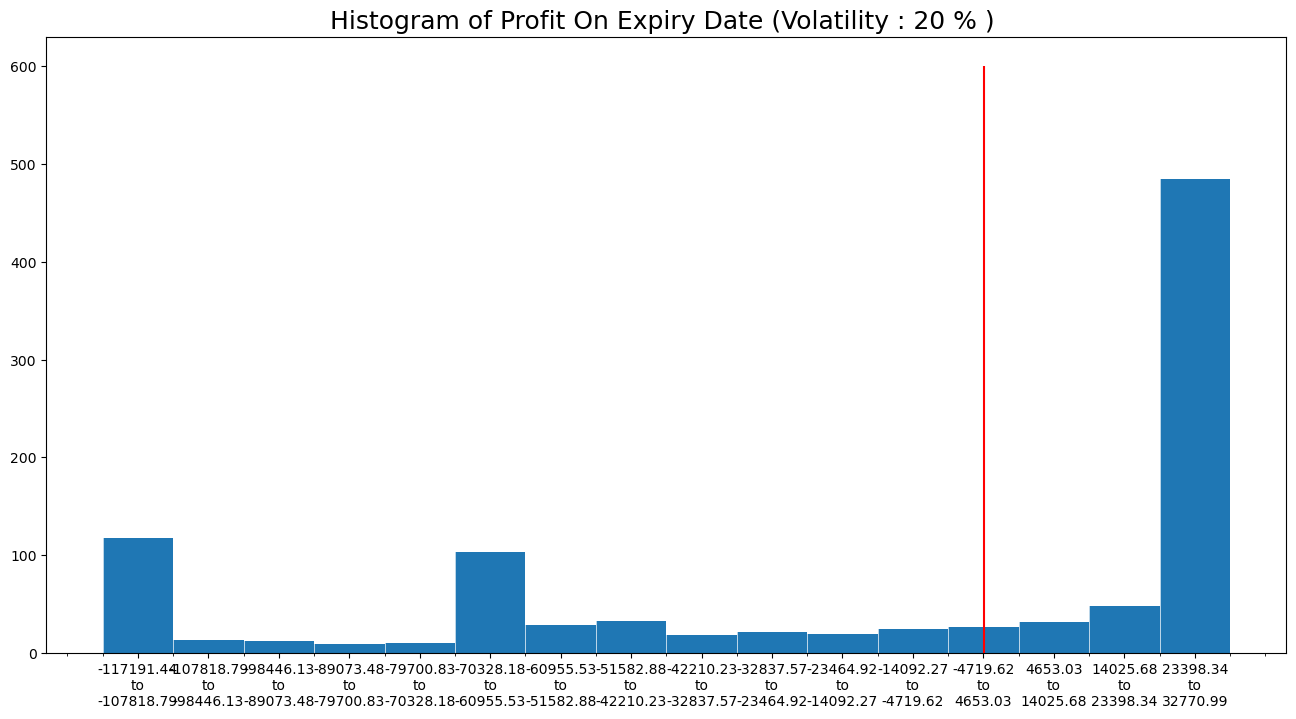

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

fig = plt.figure(figsize=(16,8))
n, bins, patches = plt.hist(df1.Profit_Expiry_Date,16)
# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
plt.vlines(0, 0, 600, color='red')
# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.title('Histogram of Profit On Expiry Date (Volatility : 20 % ) ', loc = 'center', fontsize = 18)

In [4]:
df

,Count,Price,Change_price,tenor,CE_18500,PE_16800,CE_18200,PE_17000,Total_Prem,Total_P&L
0,1,17561.000000,-109.699198,0.083333,-15263.829943,-1.165592e+04,36581.406229,23109.411942,32771.066462,0.000000
1,2,17451.300802,440.923289,0.079710,-9313.514856,-1.577005e+04,24456.147159,30534.373250,29906.955659,2864.110802
2,3,17892.224091,105.203896,0.076087,-36517.082407,-2.676547e+03,77847.869343,6401.423917,45055.663928,-12284.597466
3,4,17997.427986,103.362967,0.072464,-46022.906994,-1.447512e+03,95264.087693,3757.369054,51551.037577,-18779.971115
4,5,18100.790953,-31.246333,0.068841,-57354.153975,-7.333140e+02,115240.173271,2083.438462,59236.143777,-26465.077316
5,6,18069.544620,-172.227338,0.065217,-49385.621684,-7.039458e+02,103433.912142,2057.338718,55401.683393,-22630.616931
6,7,17897.317283,-141.723249,0.061594,-26732.454840,-1.401759e+03,64024.732550,3902.122626,39792.641082,-7021.574621
7,8,17755.594033,9.363713,0.057971,-14302.426162,-2.378915e+03,39328.845651,6387.887454,29035.391710,3735.674752
8,9,17764.957747,-75.718278,0.054348,-12989.273029,-1.888117e+03,37262.922723,5353.135207,27738.668363,5032.398099
9,10,17689.239469,-233.067198,0.050725,-8018.594655,-2.309701e+03,25939.471961,6574.487801,22185.664039,10585.402423
